# Geopandas로 geojson 파일 열어보기

- Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use:

- read_file(path/to/file)

In [ ]:
# 패키지 설치

%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
# 패키지 불러오기

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

## geojson 파일 열기

In [ ]:
pop_distribution = gpd.read_file('./06.인구(거주)분포도(100M_X_100M).geojson')
pop_distribution

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


In [ ]:
pop_distribution.geom_type[:5] # multipolygon --> 여러 좌표를 이은 선 내부의 범위

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

In [ ]:
pop_distribution.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       27350 non-null  object  
 1   val       9241 non-null   float64 
 2   geometry  27350 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 641.1+ KB


In [ ]:
print(pop_distribution.geometry[113])

MULTIPOLYGON (((126.6755550866537 37.67805296358832, 126.6755451127489 37.67895420937488, 126.6766790559897 37.6789621312533, 126.6766890161803 37.67806088521081, 126.6755550866537 37.67805296358832)))


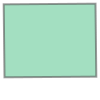

In [ ]:
pop_distribution.geometry[113]

In [ ]:
pop_distribution.loc[pop_distribution['gid'].str.contains('다사', na=False)]

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


## 아니면 fiona로 열어도 된다

In [ ]:
import fiona # shape file, geojson 모두 지원
f = fiona.open('./06.인구(거주)분포도(100M_X_100M).geojson') 
f

In [ ]:
f[23300]

{'geometry': {'coordinates': [[[(126.90804053986125, 37.676745073089194),
     (126.90803337871928, 37.67764636440103),
     (126.90916735901932, 37.67765205077654),
     (126.90917450644528, 37.67675075928099),
     (126.90804053986125, 37.676745073089194)]]],
  'type': 'MultiPolygon'},
 'id': '23300',
 'properties': OrderedDict([('gid', '다사478643'), ('val', 6.0)]),
 'type': 'Feature'}

In [ ]:
with fiona.open('./06.인구(거주)분포도(100M_X_100M).geojson') as f: 
  item_list = [item for item in f]

item_list

## 데이터 살펴보기

In [ ]:
pop_distribution.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       27350 non-null  object  
 1   val       9241 non-null   float64 
 2   geometry  27350 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 641.1+ KB


In [ ]:
pop_distribution.groupby(['gid','val']).count() # val 값이 있는 것이 9241개

,,geometry
gid,val,
다사277649,0.0,1
다사277652,8.0,1
다사277653,11.0,1
다사277656,0.0,1
다사278651,13.0,1
...,...,...
다사536607,0.0,1
다사538597,0.0,1
다사538608,0.0,1


In [ ]:
pop_distribution_val = pop_distribution.groupby(['gid','val']).sum() # val 값을 가진 것들만 추출
pop_distribution_val2 = pop_distribution_val.reset_index()
pop_distribution_val2

,gid,val,geometry
0,다사277649,0.0,"(POLYGON ((126.6800610489505 37.6807883246783,..."
1,다사277652,8.0,(POLYGON ((126.6800312865019 37.68349206341949...
2,다사277653,11.0,(POLYGON ((126.6800213648016 37.68439330938592...
3,다사277656,0.0,(POLYGON ((126.6799915970475 37.68709704644339...
4,다사278651,13.0,(POLYGON ((126.6811752076359 37.68259869660541...
...,...,...,...
9236,다사536607,0.0,(POLYGON ((126.9740400816905 37.64460990861157...
9237,다사538597,0.0,(POLYGON ((126.9763703276994 37.63560691889907...
9238,다사538608,0.0,"(POLYGON ((126.9763007352722 37.6455213004185,..."
9239,다사539608,0.0,(POLYGON ((126.9774342401782 37.64552632679178...


In [ ]:
pop_distribution_val.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9241 entries, ('다사277649', 0.0) to ('다사542608', 0.0)
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   geometry  9241 non-null   object
dtypes: object(1)
memory usage: 328.7+ KB


In [ ]:
pop_distribution_val2.info() # pandas dataframe으로 바뀜 (아마 groupby하는 과정에서 그런가봄. 원인은 추후에 update...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9241 entries, 0 to 9240
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gid       9241 non-null   object 
 1   val       9241 non-null   float64
 2   geometry  9241 non-null   object 
dtypes: float64(1), object(2)
memory usage: 216.7+ KB


In [ ]:
# csv 파일로 저장
pop_distribution_val2.to_csv('pop_distribution_val2.csv')